In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import matplotlib.ticker as mticker
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
register_matplotlib_converters()
df = pd.read_csv("fcc-forum-pageviews.csv",index_col=["date"],parse_dates=["date"],)


In [2]:
#Clean the data by filtering out days when the page views were in 
# the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df["value"] >= df["value"].quantile(0.025)) &(df["value"] <= df["value"].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [3]:
def draw_line_plot():
    
    
    plt.figure(figsize=(16,6))
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel("Date")
    plt.ylabel('Page Views')
    
    fig=plt.plot(df.index,df['value'],color='red')
    fig=plt.savefig('line_plot.png')
    return fig




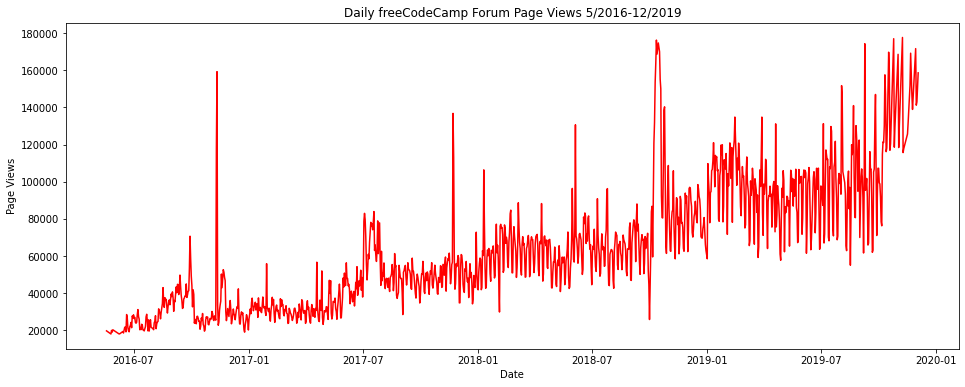

In [4]:
draw_line_plot()

In [6]:
df_bar = (df.copy().groupby(pd.Grouper(freq="M")).mean().rename(columns={"value": "avg"}))

In [9]:
df_bar
df_bar["year"] = pd.DatetimeIndex(df_bar.index).year
df_bar["month"] = pd.DatetimeIndex(df_bar.index).strftime("%B")

In [10]:
df_bar = pd.melt(
        df_bar,
        id_vars=["year", "month"],
        value_vars=["avg"],
    )


In [11]:
df_bar

,year,month,variable,value
0,2016,May,avg,19432.400000
1,2016,June,avg,21875.105263
2,2016,July,avg,24109.678571
3,2016,August,avg,31049.193548
4,2016,September,avg,41476.866667
5,2016,October,avg,27398.322581
6,2016,November,avg,40448.633333
7,2016,December,avg,27832.419355
8,2017,January,avg,32785.161290
9,2017,February,avg,31113.071429


In [14]:
df_bar=df.copy()
df_bar['year']=df_bar.index.year
df_bar['month']=df_bar.index.month



df_bar = df_bar.groupby(["year", "month"])["value"].mean()

In [22]:
# df_bar.rename(columns={'value':'count','year':'Years','month':'Months'},inplace=True)
# df_bar=pd.melt(df_bar,id_vars=['Years','Months'])
# df_bar.rename(columns={'value':'Average Page Views'},inplace=True)




df_bar=df_bar.unstack(fill_value=)

df_bar


year  month
2016  1                  NaN
      2                  NaN
      3                  NaN
      4                  NaN
      5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
  

In [7]:

# gkk = df_bar[df_bar.groupby(['Years', 'Months'])]
# gkk
# df_bar['Months']=pd.to_datetime(df_bar['Months'], format='-%m-').dt.month_name()
# df_bar

In [8]:

sns.barplot(data=df_bar)

KeyError: 0

Text(0, 0.5, 'Average Page Views')

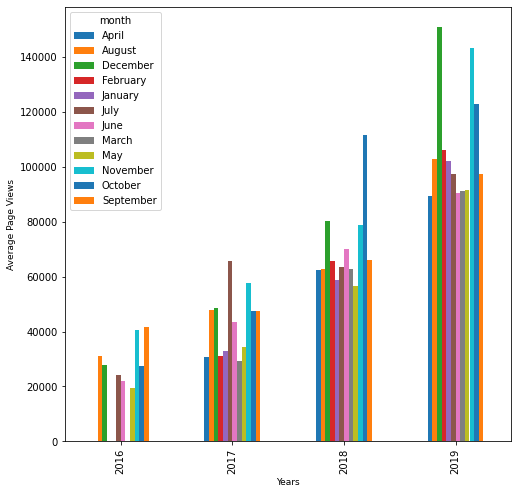

In [ ]:
fig = df_bar.plot(kind ="bar", legend = True, figsize = (8, 8)).figure
plt.xlabel("Years", fontsize= 9)
plt.ylabel("Average Page Views", fontsize= 9)